In [2]:
'''Sequence to sequence example in Keras (character-level).
This script demonstrates how to implement a basic character-level
sequence-to-sequence model. We apply it to translating
short English sentences into short French sentences,
character-by-character. Note that it is fairly unusual to
do character-level machine translation, as word-level
models are more common in this domain.
# Summary of the algorithm
- We start with input sequences from a domain (e.g. English sentences)
    and correspding target sequences from another domain
    (e.g. French sentences).
- An encoder LSTM turns input sequences to 2 state vectors
    (we keep the last LSTM state and discard the outputs).
- A decoder LSTM is trained to turn the target sequences into
    the same sequence but offset by one timestep in the future,
    a training process called "teacher forcing" in this context.
    Is uses as initial state the state vectors from the encoder.
    Effectively, the decoder learns to generate `targets[t+1...]`
    given `targets[...t]`, conditioned on the input sequence.
- In inference mode, when we want to decode unknown input sequences, we:
    - Encode the input sequence into state vectors
    - Start with a target sequence of size 1
        (just the start-of-sequence character)
    - Feed the state vectors and 1-char target sequence
        to the decoder to produce predictions for the next character
    - Sample the next character using these predictions
        (we simply use argmax).
    - Append the sampled character to the target sequence
    - Repeat until we generate the end-of-sequence character or we
        hit the character limit.
# Data download
English to French sentence pairs.
http://www.manythings.org/anki/fra-eng.zip
Lots of neat sentence pairs datasets can be found at:
http://www.manythings.org/anki/
# References
- Sequence to Sequence Learning with Neural Networks
    https://arxiv.org/abs/1409.3215
- Learning Phrase Representations using
    RNN Encoder-Decoder for Statistical Machine Translation
    https://arxiv.org/abs/1406.1078
'''
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
drumcolors = ['purple','indigo','steelblue', 'darkslategray','darkblue','mediumblue', 'blueviolet','rebeccapurple','crimson','forestgreen']


batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'fra-eng/fra.txt'

# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, 'r') as f:
    lines = f.read().split('\n')
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text = line.split('\t')
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])



print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

/Users/nolanlem/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Number of samples: 10000
Number of unique input tokens: 71
Number of unique output tokens: 93
Max sequence length for inputs: 16
Max sequence length for outputs: 63


In [ ]:

print('input character (english)', num_encoder_tokens)
print('unique output tokens (french)', num_decoder_tokens)

In [22]:
print(encoder_input_data[100,0:8]

(10000, 8, 10)


In [37]:
# my data
import config.nn_config as nn_config 
nn_params = nn_config.get_nn_params()

xtr = np.load(nn_params['training data dir'] + "metallica_seq2seq100r_X.npy")
ytr = np.load(nn_params['training data dir'] + "metallica_seq2seq100r_Y.npy")
print(xtr.shape, ytr.shape)
encoder_input_data = xtr[:, :, :] 
decoder_input_data = ytr[:,:,:]

#decoder_target_data = np.zeros((decoder_input_data.shape[0], decoder_input_data.shape[1], decoder_input_data.shape[0]))
#decoder_target_data = np.insert(decoder_input_data, 0, timezeroarray, axis=0)
#decoder_target_data= decoder_input_data

# for i in range(decoder_input_data.shape[0]):
#     for t in range(decoder_input_data.shape[1]):
#         for j in range(decoder_input_data.shape[2]):
#             if t > 0:
#                 decoder_target_data[i,t-1, j] = decoder_input_data[i,t,j]
decoder_target_data = decoder_input_data

print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

decoder_target_data = decoder_target_data[:,1:,:]
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

zarr = np.zeros((1,10))

decoder_target_data = np.insert(decoder_target_data, xtr.shape[1]-1, zarr, axis=1) # 7 = max_seqlen-1
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)


'onsetsdir' : 'np-data/onsets/metallica/'
'MIDI sequence directory' : 'plots/MIDI/metallica/'
'sequence length' : 100
'sourcedir' : 'audio/metallica/'
'midi dir' : 'midi/metallica/'
'models dir' : 'models/metallica/'
'batchsize' : 10
'ADT sequence directory' : 'plots/ADT/metallica/'
'weightsdir' : 'model-weights/metallica/'
'dev data dir' : 'np-data/dev-data/metallica/'
'model type' : 'lstm'
'epochs' : 3
'rendered midi dir' : 'midi/rendered-metallica/'
'drummer' : 'metallica'
'training data dir' : 'np-data/training-data/metallica/'
'slicedir' : 'audio/sliced/metallica/'
'loss directory' : 'plots/loss/metallica/'
'activationsdir' : 'np-data/activations/metallica/'
(168842, 100, 10) (168842, 100, 10)
(168842, 100, 10)
(168842, 100, 10)
(168842, 100, 10)
(168842, 100, 10)
(168842, 100, 10)
(168842, 99, 10)
(168842, 100, 10)
(168842, 100, 10)
(168842, 100, 10)


In [38]:
input_characters = xtr.shape[2]
target_characters = ytr.shape[1]
num_encoder_tokens = xtr.shape[2]
num_decoder_tokens = ytr.shape[2]

max_encoder_seq_length = 8
max_decoder_seq_length = 24

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

Number of samples: 10000
Number of unique input tokens: 10
Number of unique output tokens: 10
Max sequence length for inputs: 8
Max sequence length for outputs: 24


In [32]:
# input_token_index = dict(
#     [(char, i) for i, char in enumerate(input_characters)])
# target_token_index = dict(
#     [(char, i) for i, char in enumerate(target_characters)])

# encoder_input_data = np.zeros(
#     (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
#     dtype='float32')
# decoder_input_data = np.zeros(
#     (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
#     dtype='float32')
# decoder_target_data = np.zeros(
#     (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
#     dtype='float32')

# for i, target_text in enumerate(encoder_input_data):
#     for t, char in enumerate(target_text):
#         # decoder_target_data is ahead of decoder_input_data by one timestep
#         decoder_input_data[i, t, target_token_index[char]] = 1.
#         if t > 0:
#             # decoder_target_data will be ahead by one timestep
#             # and will not include the start character.
#             decoder_target_data[i, t - 1, target_token_index[char]] = 1.

In [27]:
print('english encoder shape', encoder_input_data.shape)
print('french decoder shape', decoder_input_data.shape)
print(encoder_input_data[0,0,:])
print('num ecoder tokens', num_encoder_tokens)

english encoder shape (10000, 100, 10)
french decoder shape (10000, 100, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
num ecoder tokens 10


In [97]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, 10)     0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, None, 8)      0                                            
__________________________________________________________________________________________________
lstm_7 (LSTM)                   [(None, 256), (None, 273408      input_7[0][0]                    
__________________________________________________________________________________________________
lstm_8 (LSTM)                   [(None, None, 256),  271360      input_8[0][0]                    
                                                                 lstm_7[0][1]                     
          

In [39]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens)) # num_encoder_tokens=how many characters (features)
encoder = LSTM(latent_dim, return_state=True) # latent dim = how dim to produce from encoder rep 
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]
print(len(encoder_states))

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens)) # input is None because batch size can change
                                                        # num_decoder_tokens is how output features it will generate (in my case they will be the same) 
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) # insert the encoder_states
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

2


In [40]:
# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
            )
# Save model
model.save('ss/metallica100seq.h5')

Train on 135073 samples, validate on 33769 samples
Epoch 1/100
135073/135073 [==============================] - 784s 6ms/step - loss: 0.6792 - acc: 0.2807 - val_loss: 0.8386 - val_acc: 0.2582
Epoch 2/100
135073/135073 [==============================] - 737s 5ms/step - loss: 0.4816 - acc: 0.3250 - val_loss: 0.9655 - val_acc: 0.2452
Epoch 3/100
135073/135073 [==============================] - 728s 5ms/step - loss: 0.4380 - acc: 0.3300 - val_loss: 1.0049 - val_acc: 0.2427
Epoch 4/100
135073/135073 [==============================] - 715s 5ms/step - loss: 0.4217 - acc: 0.3314 - val_loss: 1.0525 - val_acc: 0.2542
Epoch 5/100
135073/135073 [==============================] - 712s 5ms/step - loss: 0.4131 - acc: 0.3322 - val_loss: 1.0769 - val_acc: 0.2421
Epoch 6/100
135073/135073 [==============================] - 715s 5ms/step - loss: 0.4078 - acc: 0.3328 - val_loss: 1.1095 - val_acc: 0.2574
Epoch 7/100
135073/135073 [==============================] - 713s 5ms/step - loss: 0.4041 - acc: 0.3331

KeyboardInterrupt: 

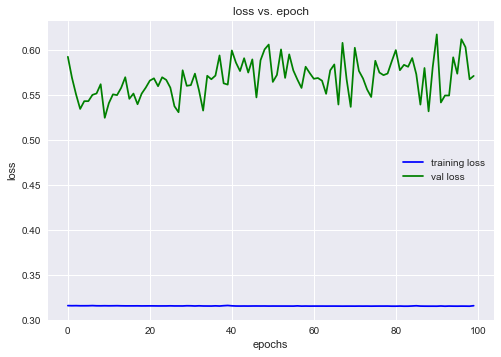

In [240]:
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.style.use('seaborn')

plt.figure()
tloss, = plt.plot(history.history["loss"], 'b', label='training loss')
vloss, = plt.plot(history.history["val_loss"], 'g', label='val loss')
plt.title('loss vs. epoch')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(handles=[tloss,vloss])
plt.savefig('ss/plots/the-loss-seqlen-100.pdf', dpi=100)
plt.show()

In [43]:
#print(model.history.keys())
plt.figure()
tacc, = plt.plot(history.history["acc"], 'darkblue', label='training (Paul Motion)')
vacc, = plt.plot(history.history["val_acc"], 'green', label='baseline')
plt.title('Accuracy vs. Epoch')
plt.legend(handles=[tacc,vacc])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
#plt.savefig('ss/plots/the-accuracy-seqlen-100.pdf', dpi=100)
plt.show()

NameError: name 'history' is not defined

In [193]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [236]:
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Reverse-lookup token index to decode sequences back to
# something readable.
# reverse_input_char_index = dict(
#     (i, char) for char, i in input_token_index.items())
# reverse_target_char_index = dict(
#     (i, char) for char, i in target_token_index.items())


thresh = 0.5
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    #print(states_value[0].shape) # this is the state at the output of the encoder LSTM

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    #target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = np.empty((1,1,10))
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)
        
        #print('output token',output_tokens[0,-1,:])

        # Sample a token
        #sampled_token_index = np.argmax(output_tokens[0, -1, :]) # pick largest value in output from softmax at output decoder layer]
        lastslice = output_tokens[0,-1,:]
        
        print('lastslice shape', lastslice.shape)
        lastslice[lastslice > thresh] = 1
        print('lastslice index', lastslice)
        #print('sample token index (argmax) ', sampled_token_index)
        
        #sampled_char = reverse_target_char_index[sampled_token_index]
        #print('sampled_char ', sampled_token_index)
        sampled_char = lastslice
        
        sampled_char = np.reshape(sampled_char, (1,1,sampled_char.shape[0]))
        print('sampled char shape', sampled_char.shape)


        decoded_sentence = np.vstack((decoded_sentence, sampled_char)) # add to sentence array (herei'll add each time slice)
        # Exit condition: either hit max length
        # or find stop character. # for me, when the sequence equals delta L , the last beat difference
        # iow, set max_decoder_seq_length = delta L
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens)) # ((1,1, 5))
        #target_seq[0, 0, :] = lastslice #1. #()
        target_seq[0,0,:] = lastslice #1. #()
        print('end target_seq',target_seq)
        print('')


        # Update states
        states_value = [h, c]

    return decoded_sentence


for seq_index in range(1000,1001):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

lastslice shape (10,)
lastslice index [0.00 1.00 0.00 0.00 0.01 0.11 0.00 0.00 0.00 0.00]
sampled char shape (1, 1, 10)
end target_seq [[[0.00 1.00 0.00 0.00 0.01 0.11 0.00 0.00 0.00 0.00]]]

lastslice shape (10,)
lastslice index [0.00 1.00 0.00 0.00 0.00 0.02 0.00 0.00 0.00 0.00]
sampled char shape (1, 1, 10)
end target_seq [[[0.00 1.00 0.00 0.00 0.00 0.02 0.00 0.00 0.00 0.00]]]

lastslice shape (10,)
lastslice index [0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
sampled char shape (1, 1, 10)
end target_seq [[[0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]]

lastslice shape (10,)
lastslice index [0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
sampled char shape (1, 1, 10)
end target_seq [[[0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]]

lastslice shape (10,)
lastslice index [0.00 1.00 0.00 0.00 0.00 0.25 0.00 0.00 0.00 0.00]
sampled char shape (1, 1, 10)
end target_seq [[[0.00 1.00 0.00 0.00 0.00 0.25 0.00 0.00 0.00 0.00]]]

lastslice shape (10,)
lastslice index [0

/Users/nolanlem/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:74: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [42]:
encoder_input_data.shape

(168842, 100, 10)

In [200]:
decoded_sentence[0:5,:,:]
#ds = np.reshape(decoded_sentence, (1,25,10))
ds = decoded_sentence
print(ds.shape)

(25, 1, 10)


In [245]:
a = np.array([0.1, 0.3, 0.9])
bins = np.linspace(0, 1.0, 10)
idx = np.digitize(a, bins)
print(idx)

[1 3 9]


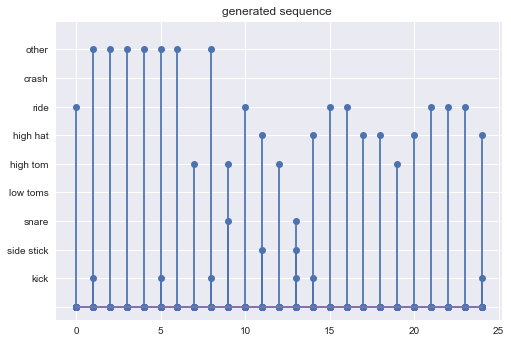

In [257]:

plt.figure()

sc = np.linspace(1.0,0,11)
colors = ['iter(cm.rainbow(np.linspace(0, 1, 10)))']

# digitize bins
bins = np.linspace(0, 1.0, 10)

for i in range(ds.shape[2]):
    dd = ds[:,0,i]
    #idx = np.digitize(digidrums, bins)
    #idx /= 10
    markerlines = plt.stem(np.round(dd*sc[i],1))
    #plt.setp(markerlines, 'color', drumcolors[i])
    
ax1 = plt.gca()
ax1.set_yticks(sc)
ax1.set_yticklabels((r'',r'other', r'crash', r'ride','high hat','high tom','low toms','snare','side stick','kick',''))
plt.title('generated sequence ')
plt.show()